Columns in the dataset: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
First few rows of the dataset:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             1588119

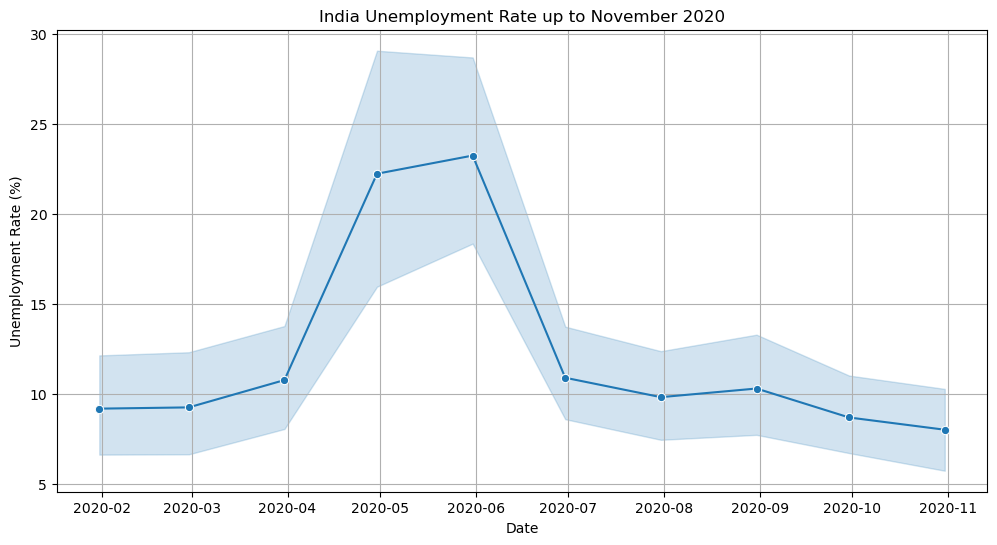

In [28]:
# Import necessary libraries
#!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import folium

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your Seaborn code here

# Step 1: Load the Data
file_path = 'Unemployment_Rate_upto_11_2020.csv'  # Update with the actual path to your CSV file
df = pd.read_csv(file_path)

# Step 2: Understand the Structure
print("Columns in the dataset:", df.columns)
print("First few rows of the dataset:\n", df.head())

# Step 3: Data Preparation
# Clean column names by stripping any leading/trailing whitespaces
df.columns = df.columns.str.strip()

# Convert the 'Date' column to datetime format with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values if necessary
df.dropna(inplace=True)

# Filter data to include only up to November 2020
df = df[df['Date'] <= '2020-11-30']

# Ensure there are no infinite values or NaNs before plotting
assert not df.isin([np.inf, -np.inf]).any().any(), "Data contains infinity values"
assert not df.isnull().any().any(), "Data contains NaN values"

# Step 4: Exploratory Data Analysis (EDA)
# Plot the unemployment rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', marker='o')
plt.title('India Unemployment Rate up to November 2020')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


# Step 5: Feature Engineering
# Create features if necessary (e.g., lagged variables, interaction terms)

# Step 6: Documentation and Reporting
# Findings and visualizations have been displayed using plots

# Optional: Save the cleaned and processed data for future use
df.to_csv('cleaned_unemployment_data.csv', index=False)


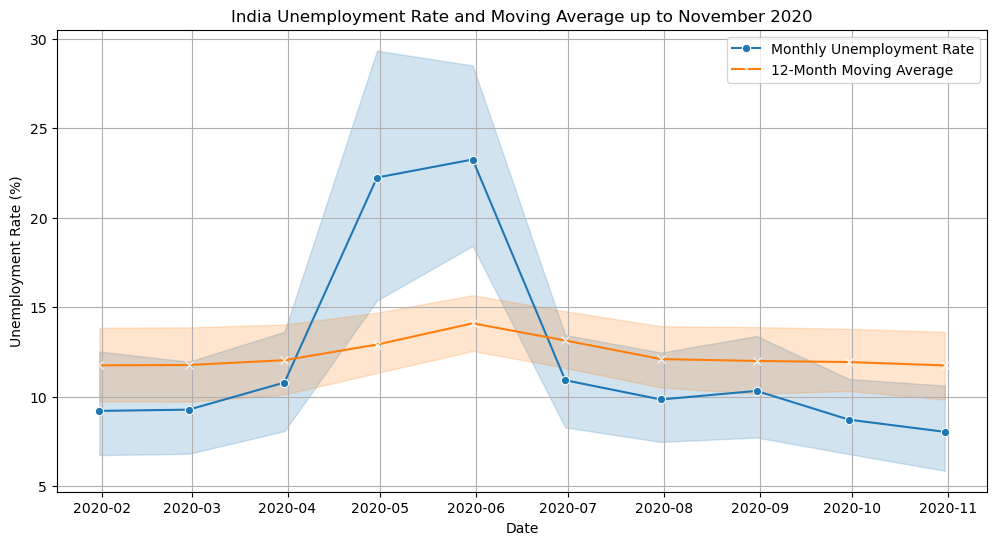

In [29]:
# Additional Analysis: Calculate and plot the moving average
df['Moving_Avg'] = df['Estimated Unemployment Rate (%)'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', marker='o', label='Monthly Unemployment Rate')
sns.lineplot(data=df, x='Date', y='Moving_Avg', marker='x', label='12-Month Moving Average')
plt.title('India Unemployment Rate and Moving Average up to November 2020')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


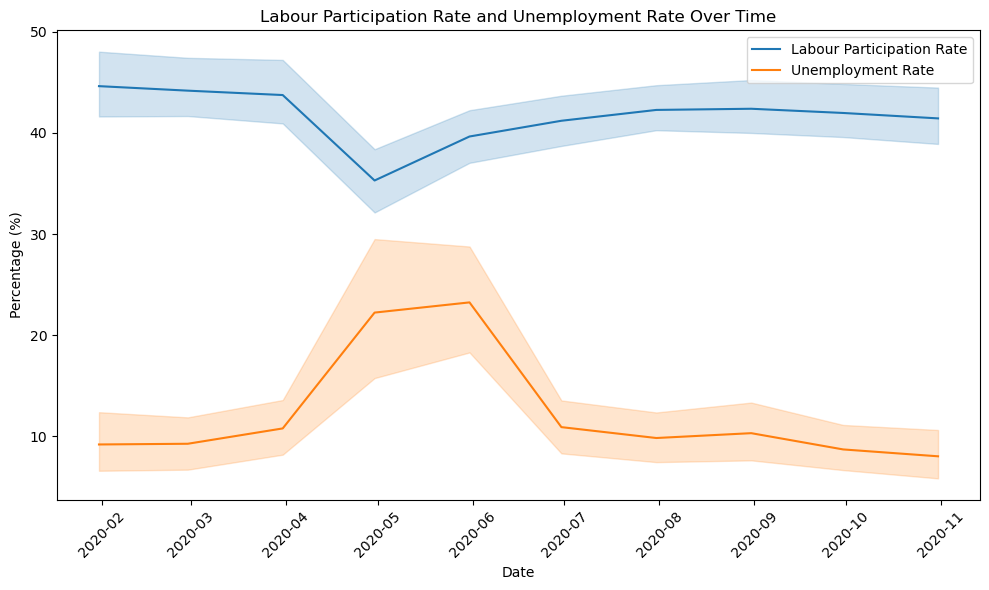

In [11]:
plt.figure(figsize=(10, 6))

# Estimated Labour Participation Rate plot
sns.lineplot(data=df, x='Date', y='Estimated Labour Participation Rate (%)', label='Labour Participation Rate')

# Estimated Unemployment Rate plot
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', label='Unemployment Rate')

# Set plot title and labels
plt.title('Labour Participation Rate and Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

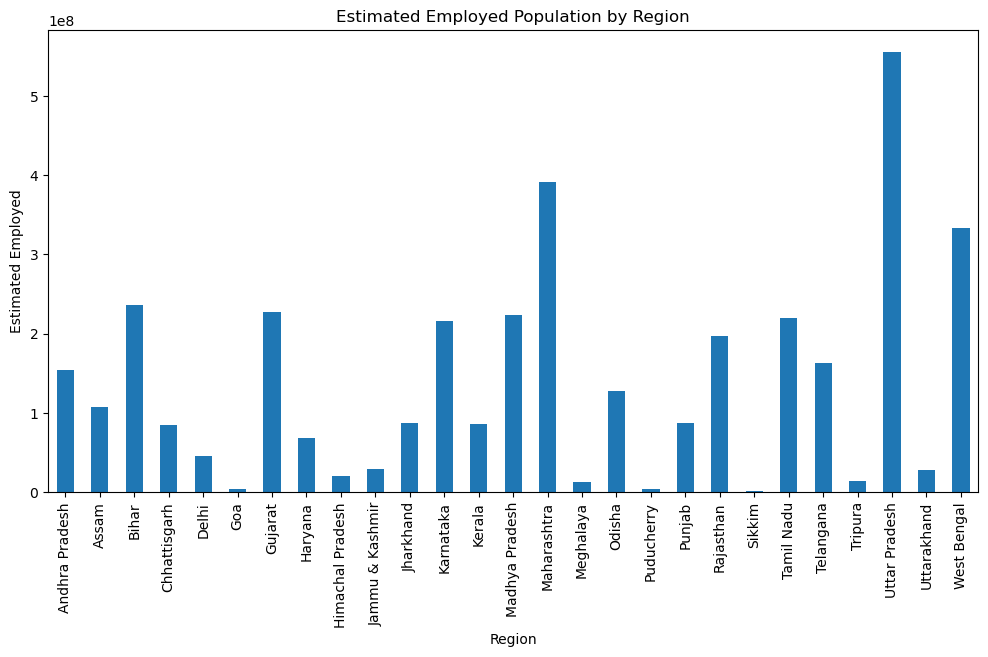

In [14]:
region_grouped = df.groupby('Region')['Estimated Employed'].sum()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
region_grouped.plot(kind='bar')
plt.title('Estimated Employed Population by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Employed')
plt.show()

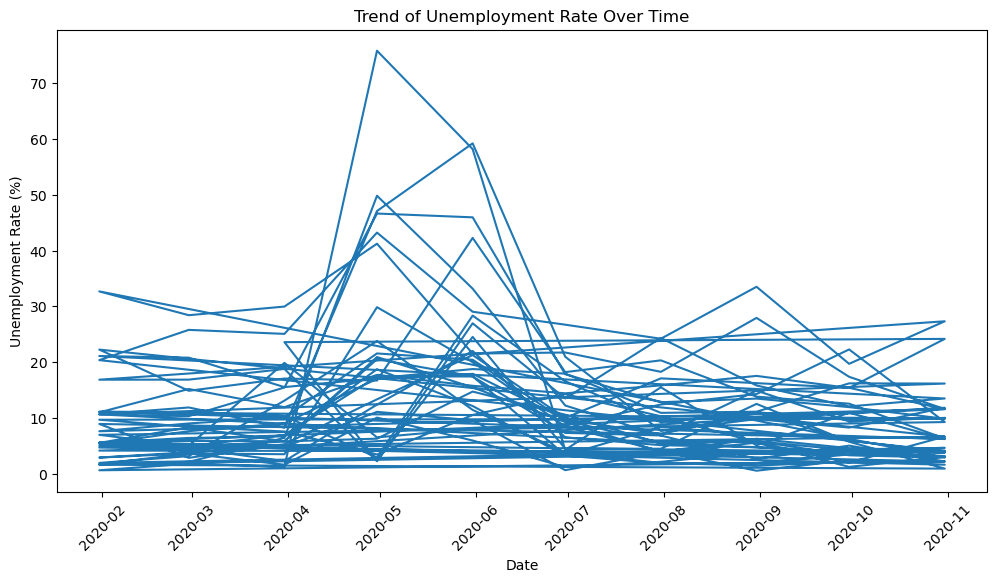

In [15]:
# Plotting the line chart

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.title('Trend of Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

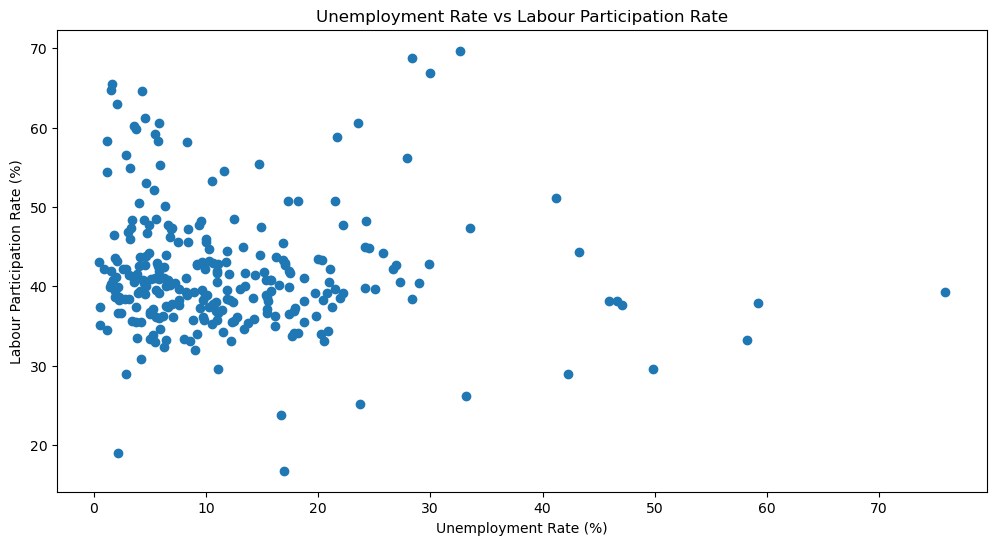

In [17]:
# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Estimated Unemployment Rate (%)'], df['Estimated Labour Participation Rate (%)'])
plt.title('Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Labour Participation Rate (%)')
plt.show()

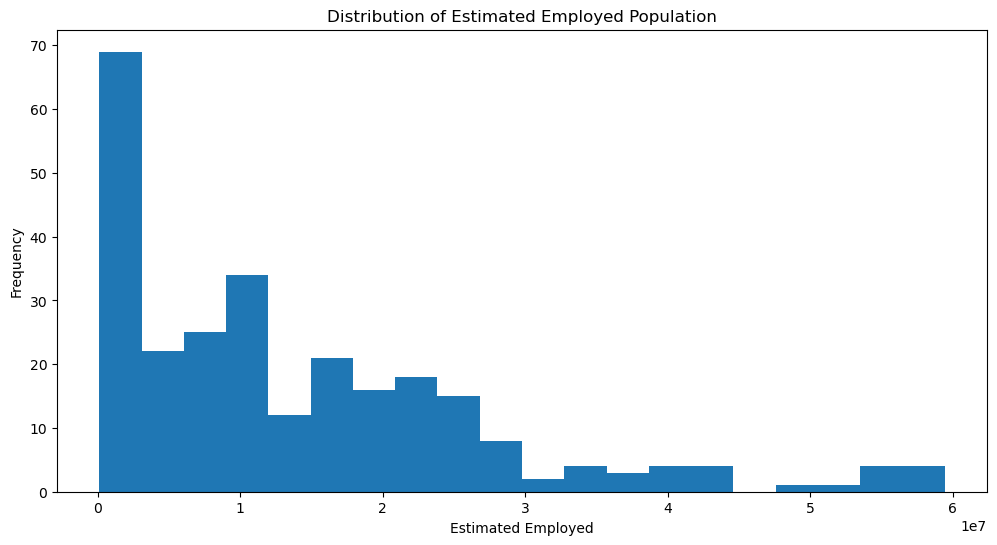

In [20]:
# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(df['Estimated Employed'], bins=20)
plt.title('Distribution of Estimated Employed Population')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')
plt.show()

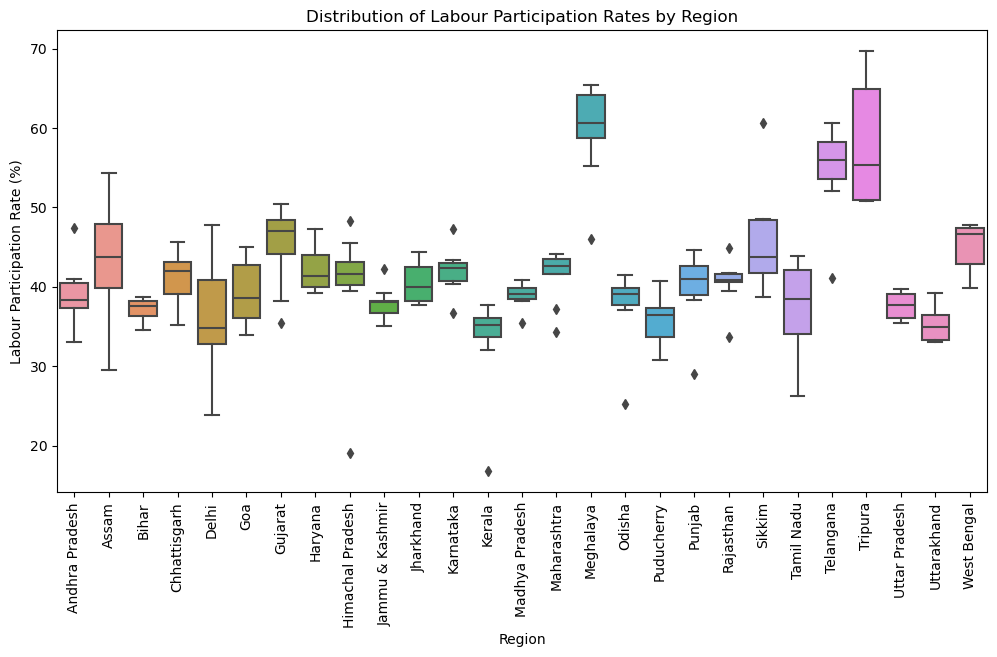

In [31]:
# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df)
plt.title('Distribution of Labour Participation Rates by Region')
plt.xlabel('Region')
plt.ylabel('Labour Participation Rate (%)')
plt.xticks(rotation=90)
plt.show()